In [39]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy as sp
from scipy import stats

In [75]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data' \
                ,header=None)
cols = ['sex','length','diameter','height','whole_weight','shucked_weight','viscera_weight','shell_weight','rings']
df.columns = cols
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [93]:
df.sex.replace('M',1, inplace=True)
df.sex.replace('F',2, inplace=True)
df.sex.replace('I',3,inplace=True)
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [94]:
df.isnull().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   int64  
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


In [99]:
for i in df:
    print(f'skewness of {i} is {stats.skew(df[i])} and its kurtosis value is {stats.kurtosis(df[i])}')

skewness of sex is 0.08302567413348133 and its kurtosis value is -1.5356698628175567
skewness of length is -0.6396434615451078 and its kurtosis value is 0.06310755265972467
skewness of diameter is -0.6089793517180232 and its kurtosis value is -0.04685725781261718
skewness of height is 3.127693679207538 and its kurtosis value is 75.93309871329375
skewness of whole_weight is 0.5307678720133928 and its kurtosis value is -0.025051305562984627
skewness of shucked_weight is 0.7188396611678955 and its kurtosis value is 0.5929754415645077
skewness of viscera_weight is 0.5916395905344537 and its kurtosis value is 0.08247512417945213
skewness of shell_weight is 0.6207038222275745 and its kurtosis value is 0.5298535134982196
skewness of rings is 1.1137017739656028 and its kurtosis value is 2.3264623620128333


In [53]:
# hence from the above it can be inferred that height and rings are not normally distributed among the data

In [115]:
np.corrcoef(df.diameter, df.shell_weight)

array([[1.        , 0.90532978],
       [0.90532978, 1.        ]])

/home/bunny/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='rings'>

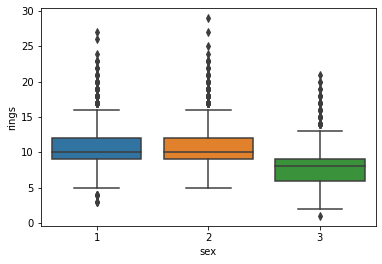

In [117]:
sns.boxplot(df.sex,df.rings)

In [118]:
df.describe()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,1.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,1.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,2.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,3.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,3.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [122]:
df[ df.height == df[df.sex == 2].height.max()] # filtering data with df

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
2051,2,0.455,0.355,1.13,0.594,0.332,0.116,0.1335,8


In [129]:
df[df.length == df[df.sex == 1].length.max()]

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
1209,2,0.78,0.63,0.215,2.657,1.4880,0.4985,0.5860,11
3715,1,0.78,0.60,0.210,2.548,1.1945,0.5745,0.6745,11


In [172]:
grouped_data = df[df.rings > np.mean(df.rings)].groupby('sex')

In [178]:
grouped_data.mean()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
sex,,,,,,,,
1,0.592434,0.465657,0.162808,1.137232,0.484805,0.246481,0.329990,12.271293
2,0.594785,0.469026,0.163867,1.131720,0.470961,0.248647,0.332663,12.462061
3,0.530324,0.411822,0.141377,0.750818,0.315848,0.160451,0.227844,11.870445


In [179]:
grouped_data.median()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
sex,,,,,,,,
1,0.60,0.475,0.165,1.1135,0.4655,0.2375,0.3220,11.0
2,0.61,0.475,0.165,1.1150,0.4655,0.2450,0.3225,11.0
3,0.54,0.420,0.140,0.7510,0.3065,0.1575,0.2250,11.0


In [192]:
grouped_data.corrwith(df.shell_weight)

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
sex,,,,,,,,
1,0.842469,0.855111,0.771201,0.906488,0.793488,0.801740,1.0,0.261360
2,0.854474,0.863293,0.795518,0.911210,0.779156,0.809528,1.0,0.243459
3,0.889911,0.883942,0.815046,0.942282,0.857158,0.874773,1.0,0.230607
